In [22]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df



,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


Convert the Date column to DateTime format

In [24]:
df["Date"] = pd.to_datetime(df["Date"])

# Display the first few rows to confirm the change
print(df.dtypes)  # Check the data types
print(df.head())  

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object
        Date    Open    High     Low   Close     Volume
0 2017-01-03  778.81  789.63  775.80  786.14  1,657,300
1 2017-01-04  788.36  791.34  783.16  786.90  1,073,000
2 2017-01-05  786.08  794.48  785.02  794.02  1,335,200
3 2017-01-06  795.26  807.90  792.20  806.15  1,640,200
4 2017-01-09  806.40  809.97  802.83  806.65  1,272,400


hamndle missing values

In [26]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# ✅ Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

# ✅ Verify if missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing Values in Each Column:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Missing Values After Handling:
 Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


C:\Users\rekha\AppData\Local\Temp\ipykernel_29840\2839733267.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


Set Date as the index for time-series analysis.


In [28]:
df.set_index("Date", inplace=True)

# ✅ Display first few rows to confirm
print(df.head())

# ✅ Check DataFrame info
print(df.info())

              Open    High     Low   Close     Volume
Date                                                 
2017-01-03  778.81  789.63  775.80  786.14  1,657,300
2017-01-04  788.36  791.34  783.16  786.90  1,073,000
2017-01-05  786.08  794.48  785.02  794.02  1,335,200
2017-01-06  795.26  807.90  792.20  806.15  1,640,200
2017-01-09  806.40  809.97  802.83  806.65  1,272,400
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes
None


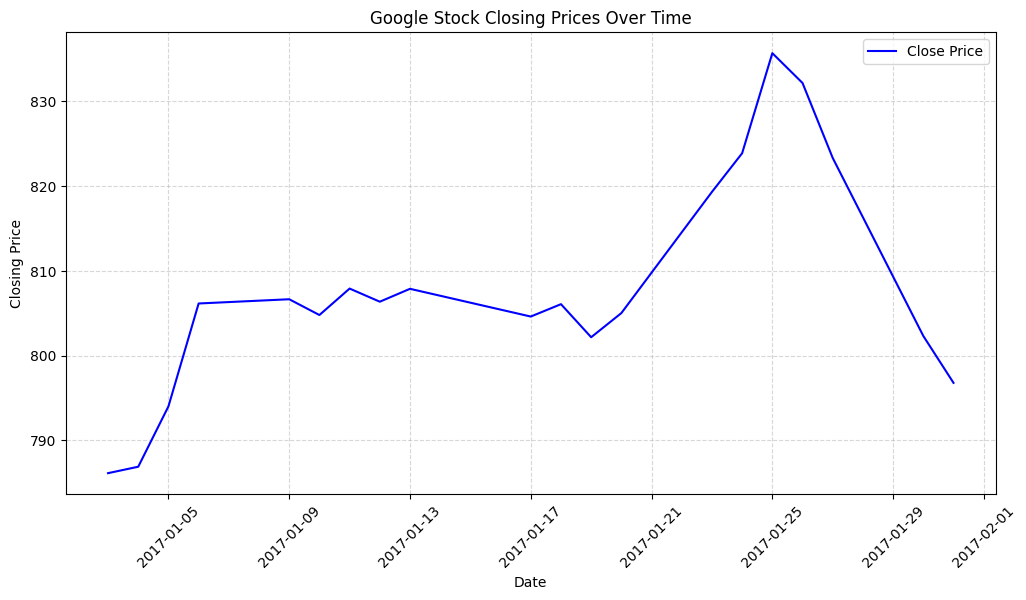

In [30]:
plt.figure(figsize=(12, 6))  # Set a proper figure size
plt.plot(df.index, df["Close"], label="Close Price", color='blue', linewidth=1.5)  # Adjust linewidth for better visibility

# ✅ Improve readability of X-axis labels
plt.xticks(rotation=45)  # Rotate X-axis labels for better readability
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Google Stock Closing Prices Over Time")

# ✅ Adjust grid and legend
plt.grid(True, linestyle="--", alpha=0.5)  # Add a light dashed grid
plt.legend()

# ✅ Show plot
plt.show()

Analyze seasonality, trends, and noise in the data.


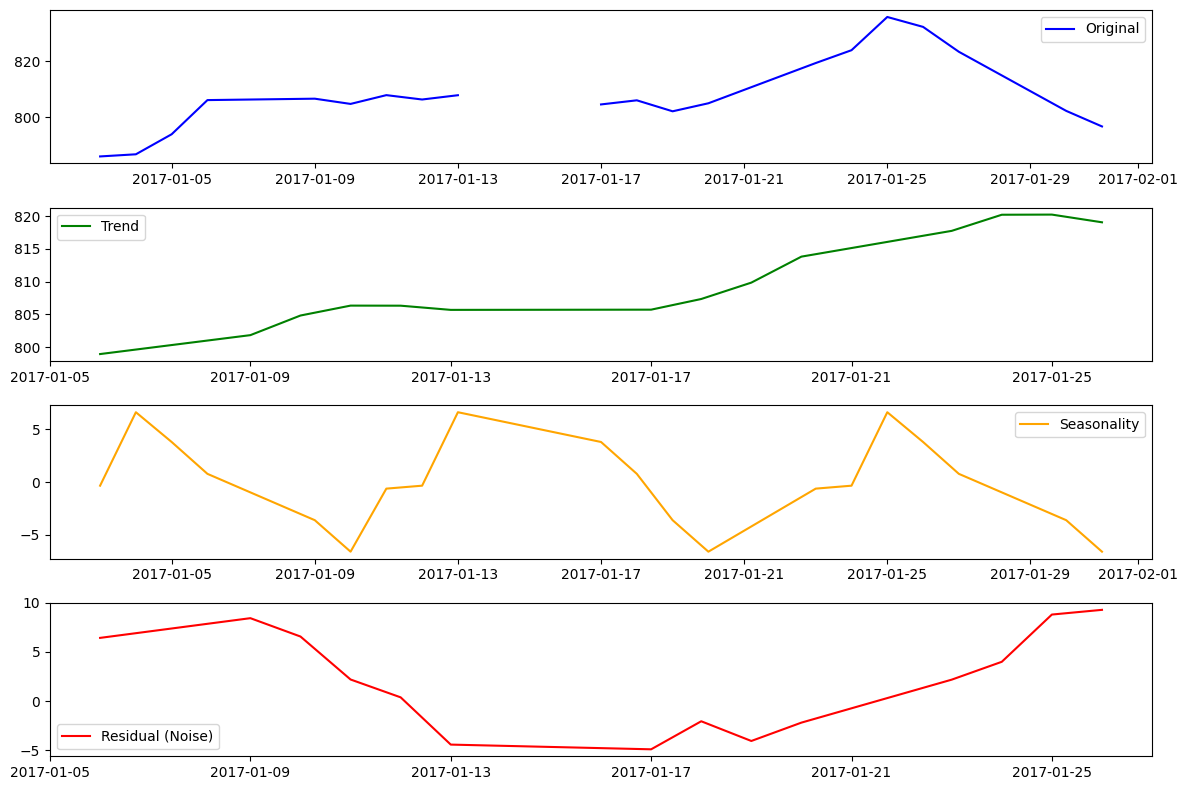

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert "Date" column to DateTime format
df["Date"] = pd.to_datetime(df["Date"])

# Set "Date" as index
df.set_index("Date", inplace=True)

# Ensure data is sorted (important for time series)
df = df.sort_index()

# ✅ Automatically detect the period
df = df.asfreq("B")  # B = Business Day Frequency (For stock market data)

# ✅ Choose a valid period based on available data
period = 7  # Weekly seasonality

# Perform time-series decomposition
decomposition = seasonal_decompose(df["Close"].dropna(), model="additive", period=period)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df["Close"], label="Original", color="blue")
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label="Trend", color="green")
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label="Seasonality", color="orange")
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label="Residual (Noise)", color="red")
plt.legend()

plt.tight_layout()
plt.show()


Create lag features (previous day’s close price as a feature).


In [40]:
df["Close_Lag_1"] = df["Close"].shift(1)

# ✅ Drop the first row with NaN (since it has no previous day's data)
df = df.dropna()

# Display the first few rows
print(df.head())

              Open    High     Low   Close     Volume  Close_Lag_1
Date                                                              
2017-01-04  788.36  791.34  783.16  786.90  1,073,000       786.14
2017-01-05  786.08  794.48  785.02  794.02  1,335,200       786.90
2017-01-06  795.26  807.90  792.20  806.15  1,640,200       794.02
2017-01-09  806.40  809.97  802.83  806.65  1,272,400       806.15
2017-01-10  807.86  809.13  803.51  804.79  1,176,800       806.65


Perform rolling window calculations (moving averages, etc.).

Empty DataFrame
Columns: [Open, High, Low, Close, Volume, SMA_10, SMA_30, EMA_10, EMA_30, Rolling_Std_10]
Index: []


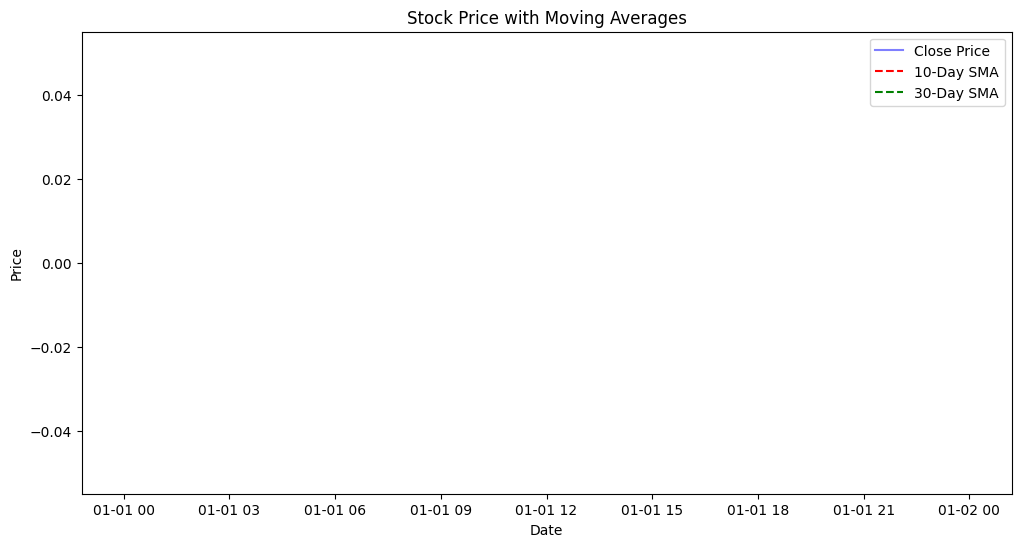

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert "Date" column to DateTime format and set it as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure data is sorted by date
df = df.sort_index()

# ✅ Calculate Moving Averages
df["SMA_10"] = df["Close"].rolling(window=10).mean()  # 10-day Simple Moving Average
df["SMA_30"] = df["Close"].rolling(window=30).mean()  # 30-day Simple Moving Average

# ✅ Calculate Exponential Moving Average (EMA)
df["EMA_10"] = df["Close"].ewm(span=10, adjust=False).mean()  # 10-day EMA
df["EMA_30"] = df["Close"].ewm(span=30, adjust=False).mean()  # 30-day EMA

# ✅ Calculate Rolling Standard Deviation (Volatility)
df["Rolling_Std_10"] = df["Close"].rolling(window=10).std()  # 10-day Rolling Std Dev

# ✅ Drop NaN values generated due to rolling calculation
df = df.dropna()

# Display first few rows
print(df.head())

# 📊 Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price", color="blue", alpha=0.5)
plt.plot(df["SMA_10"], label="10-Day SMA", color="red", linestyle="dashed")
plt.plot(df["SMA_30"], label="30-Day SMA", color="green", linestyle="dashed")
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


Train an ARIMA (AutoRegressive Integrated Moving Average) model for forecasting.


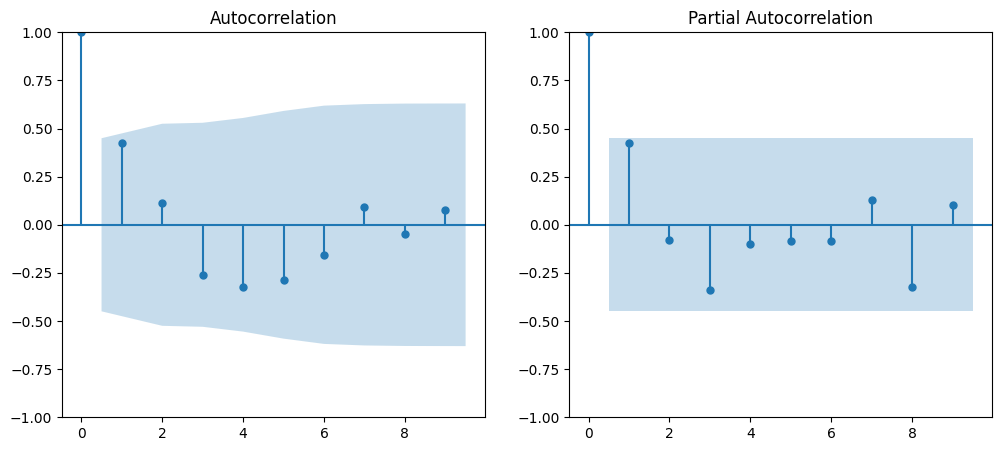

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   20
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -61.710
Date:                Wed, 05 Mar 2025   AIC                            133.420
Time:                        01:34:16   BIC                            138.142
Sample:                             0   HQIC                           134.219
                                 - 20                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0791      0.284      3.806      0.000       0.523       1.635
ar.L2         -0.8577      0.410     -2.093      0.036      -1.661      -0.055
ma.L1         -0.7354    110.379     -0.007      0.9

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


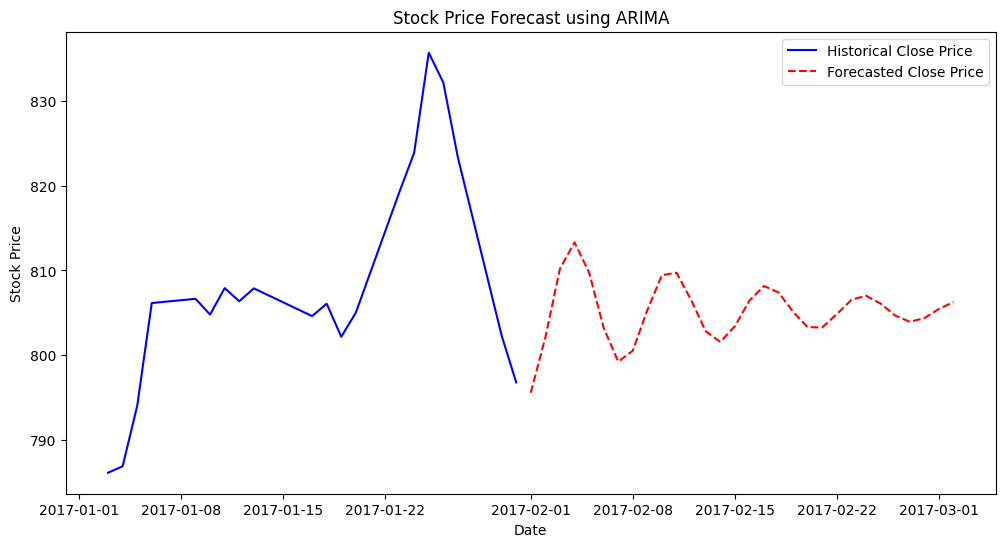

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Load Dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert Date column to DateTime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure data is sorted by date
df = df.sort_index()

# Select the target variable
data = df["Close"]

# Apply Differencing (To Remove Trend)
data_diff = data.diff().dropna()

# ✅ Dynamically adjust the number of lags
max_lags = min(len(data_diff) // 2, 20)  # Ensure enough data points for lags

# Plot ACF & PACF only if enough data points exist
if max_lags > 1:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sm.graphics.tsa.plot_acf(data_diff, lags=max_lags, ax=axes[0])
    sm.graphics.tsa.plot_pacf(data_diff, lags=max_lags, ax=axes[1])

    plt.show()
else:
    print("Not enough data points for ACF & PACF plots.")

# ✅ Train ARIMA Model
p, d, q = 2, 1, 2  # Adjust based on ACF & PACF
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())  # Model summary

# ✅ Forecast Future Prices
forecast_steps = 30  # Forecast for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# ✅ Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Close Price", color="blue")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq="D")[1:], 
         forecast, label="Forecasted Close Price", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecast using ARIMA")
plt.legend()
plt.show()


Tune ARIMA (p, d, q) parameters for better accuracy.

ARIMA(0, 0, 0) - AIC: 162.9709067703118
ARIMA(0, 0, 1) - AIC: 148.99411628120555
ARIMA(0, 0, 2) - AIC: 139.2604553060324
ARIMA(0, 0, 3) - AIC: 140.13107830539656
ARIMA(0, 1, 0) - AIC: 134.34581947648118
ARIMA(0, 1, 1) - AIC: 133.32241364950366
ARIMA(0, 1, 2) - AIC: 133.22675976870306
ARIMA(0, 1, 3) - AIC: 132.65923114433184
ARIMA(1, 0, 0) - AIC: 144.66729673910677
ARIMA(1, 0, 1) - AIC: 142.81700070890503
ARIMA(1, 0, 2) - AIC: 139.75202216541348
ARIMA(1, 0, 3) - AIC: 141.52734333592358
ARIMA(1, 1, 0) - AIC: 132.52411865828236
ARIMA(1, 1, 1) - AIC: 134.51994525990227
ARIMA(1, 1, 2) - AIC: 136.6869403520731
ARIMA(1, 1, 3) - AIC: 134.59358494166798
ARIMA(2, 0, 0) - AIC: 139.4141868178649
ARIMA(2, 0, 1) - AIC: 140.65125547302196
ARIMA(2, 0, 2) - AIC: 139.74332092460054
ARIMA(2, 0, 3) - AIC: 141.19810826593744
ARIMA(2, 1, 0) - AIC: 134.50978614085116
ARIMA(2, 1, 1) - AIC: 136.19225883539568
ARIMA(2, 1, 2) - AIC: 133.42021013587714
ARIMA(2, 1, 3) - AIC: 134.16289830925047
ARIMA(3, 0, 0) - AIC

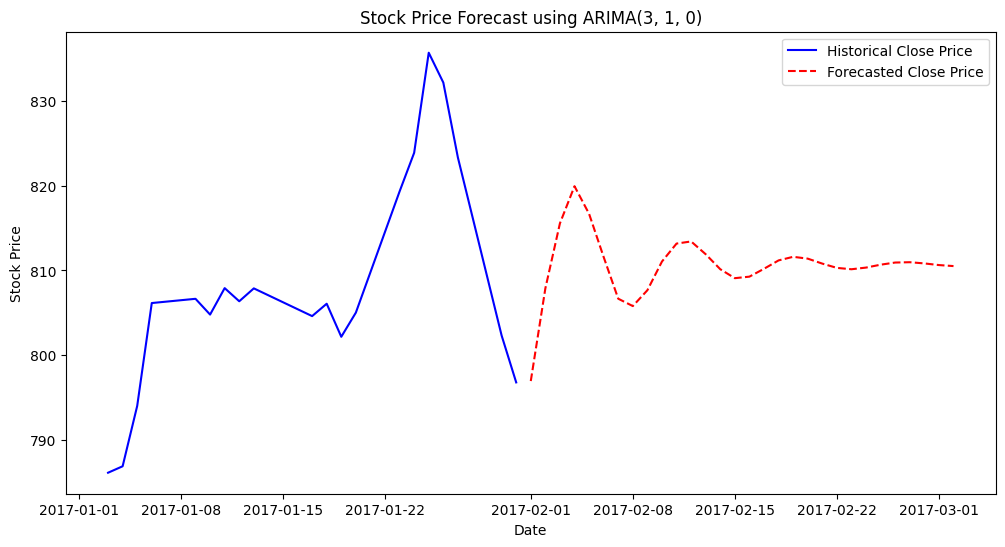

In [53]:
import pandas as pd
import numpy as np
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert Date column to DateTime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure data is sorted by date
df = df.sort_index()

# Select target variable
data = df["Close"]

# Apply Differencing (To Make Data Stationary)
data_diff = data.diff().dropna()

# Define range of parameters for p, d, q
p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)

best_aic = float("inf")  # Initialize best AIC as infinity
best_order = None
best_model = None

# Grid Search for Best (p, d, q)
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(data, order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic  # Get AIC value

        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
            best_model = model_fit

        print(f"ARIMA({p}, {d}, {q}) - AIC: {aic}")
    except:
        continue  # Skip if model fails

# Print Best Model Parameters
print(f"\nBest ARIMA Model: {best_order} with AIC: {best_aic}")

# Forecast Future Prices Using Best Model
forecast_steps = 30  # Forecast next 30 days
forecast = best_model.forecast(steps=forecast_steps)

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(data, label="Historical Close Price", color="blue")
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq="D")[1:], 
         forecast, label="Forecasted Close Price", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Forecast using ARIMA{best_order}")
plt.legend()
plt.show()


Compare actual vs. predicted stock prices.

RMSE: 38.66


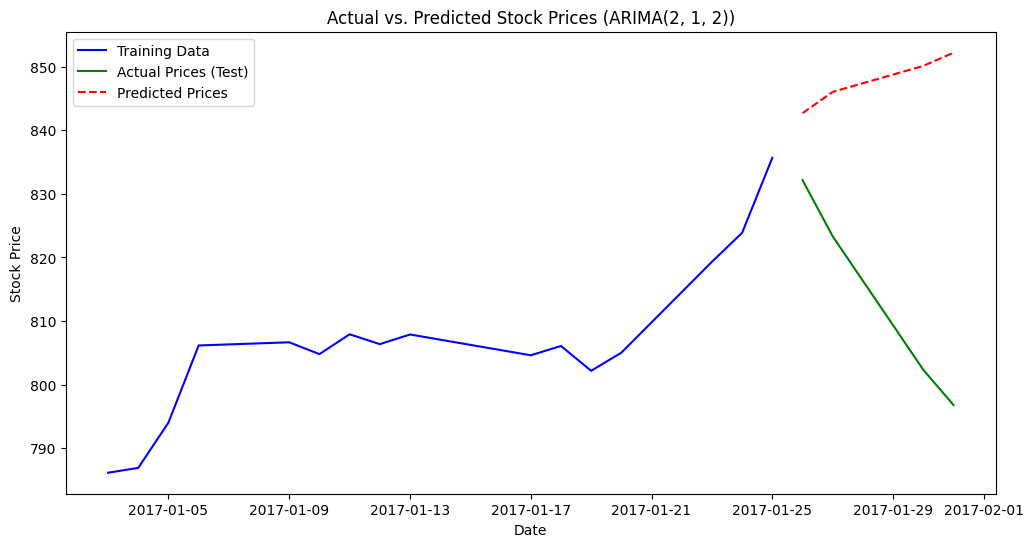

In [56]:
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert Date column to DateTime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure data is sorted by date
df = df.sort_index()

# Select target variable
data = df["Close"]

# Split Data (80% Train, 20% Test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Train ARIMA Model (Use Best (p, d, q) from Grid Search)
best_p, best_d, best_q = (2, 1, 2)  # Replace with optimal values found earlier
model = ARIMA(train, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Forecast on Test Data
predictions = model_fit.forecast(steps=len(test))

# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f"RMSE: {rmse:.2f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data", color="blue")
plt.plot(test, label="Actual Prices (Test)", color="green")
plt.plot(test.index, predictions, label="Predicted Prices", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Actual vs. Predicted Stock Prices (ARIMA({best_p}, {best_d}, {best_q}))")
plt.legend()
plt.show()


Plot the forecast vs. real stock prices for visualisation.

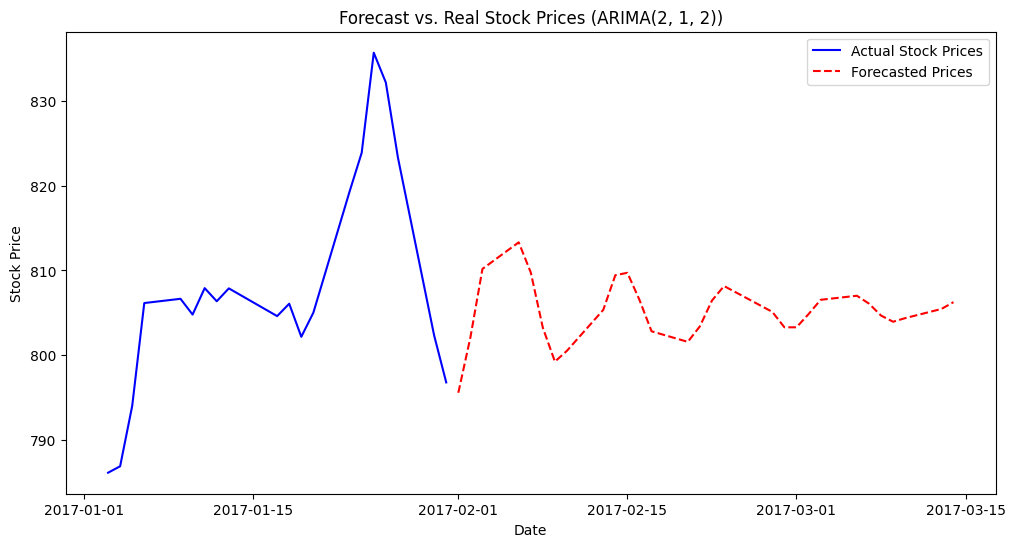

In [59]:
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
warnings.filterwarnings("ignore")

# Load Dataset
df = pd.read_csv("C:/Users/rekha/Downloads/Google_Stock_Price_Test.csv")
df

# Convert Date column to DateTime format and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure data is sorted by date
df = df.sort_index()

# Select target variable
data = df["Close"]

# Train ARIMA Model (Use Best (p, d, q))
best_p, best_d, best_q = (2, 1, 2)  # Replace with optimal values found earlier
model = ARIMA(data, order=(best_p, best_d, best_q))
model_fit = model.fit()

# Forecast future stock prices (next 30 days)
future_steps = 30
forecast = model_fit.forecast(steps=future_steps)

# Create date range for future predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq="B")[1:]

# Plot Actual vs. Forecasted Prices
plt.figure(figsize=(12, 6))
plt.plot(data, label="Actual Stock Prices", color="blue")
plt.plot(future_dates, forecast, label="Forecasted Prices", color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Forecast vs. Real Stock Prices (ARIMA({best_p}, {best_d}, {best_q}))")
plt.legend()
plt.show()
